In [12]:
%who

DateFormatter	 DayLocator	 axvline	 df	 merge	 mergeYahoo	 msno	 nltk	 np	 
os	 pd	 plt	 roc_curve	 sns	 


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter
import seaborn as sns
import nltk
import missingno as msno
from mergeStock import merge, mergeYahoo

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shelly/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/shelly/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = mergeYahoo('TSLA')

[*********************100%***********************]  1 of 1 completed


/Users/shelly/Google Drive/DS4A - Team 23/mergeStock.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['close_T-1'] = price_df.Close.shift(periods =1)
/Users/shelly/Google Drive/DS4A - Team 23/mergeStock.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['Y']= price_df.apply(lambda x: 1 if (x['Close'] - x['close_T-1']) > 0 else 0, axis=1).shift(periods =-1)


Text(0.5, 1.0, 'Closing Price for Tesla')

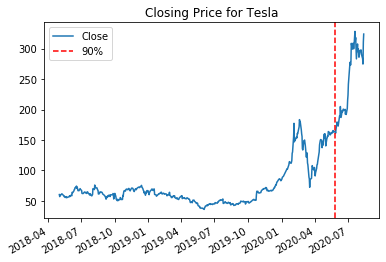

In [3]:
from matplotlib.pyplot import axvline
%matplotlib inline
#fig, ax = plt.subplots()
df.Close.plot()
plt.axvline(x='2020-05-26', color='r',linestyle='--', label ='90%')
plt.legend()
plt.title('Closing Price for Tesla')
#plt.xlabel(df.index)
#plt.show()

In [6]:
df['leading_sentiment'] = (df.pos_sum.abs() > df.neg_sum.abs()) #.astype(int)

In [7]:
print(df.columns.tolist())

['popularity_daily_avg', 'popularity_open', 'popularity_close', 'popularity_daily_change', 'Open', 'Close', 'Volume', 'close_T-1', 'Y', 'logReturnClosePrev1', 'returnClosePrev1', 'returnClosePrev5', 'returnOpenPrev1', 'returnOpenPrev5', 'VIX Open', 'VIX High', 'VIX Low', 'VIX Close', 'VIX_Close_T-1', 'vix_returnPrev1', 'vader_mean', 'vader_std', 'comment_count', 'pos_count', 'neg_count', 'pos_mean', 'neg_mean', 'pos_sum', 'neg_sum', 'leading_sentiment']


In [8]:
len( ['popularity_open', 'popularity_close','popularity_daily_change', 
             'Open', 'Close', 'Volume', 'returnClosePrev1', 'returnClosePrev5', 'returnOpenPrev1', 'returnOpenPrev5',
             'VIX Open','VIX Close','vix_returnPrev1',
             'comment_count', 'pos_mean', 'neg_mean'])

16

In [50]:
def dataProcessing(df,scaler_choice='MinMax', split=0.8, features='customized'):
    # define input variable
    if features =='customized':
        X = ['popularity_close','popularity_daily_change', 
             'Open', 'Close','Volume', 'returnClosePrev1', 'returnClosePrev5', 'returnOpenPrev1', 'returnOpenPrev5',
             'vix_returnPrev1',
             'vader_mean', 'vader_std','comment_count', 'pos_mean', 'neg_mean','leading_sentiment']
    if features =='all':
        X = df.columns.tolist()
        X.remove('Y')
    # define target variable
    Y = ['Y']
    df[Y] = df[Y].astype(int)
    
    # train test split 
    train = df[:int(len(df)*split)]
    test = df[int(len(df)*split):]
    
    # MinMax Scaler
    from sklearn.preprocessing import MinMaxScaler, StandardScaler
    
    if scaler_choice == 'MinMax':
        scaler = MinMaxScaler()
        train[X] = scaler.fit_transform(train[X])
        test[X] = scaler.transform(test[X])
    if scaler_choice == 'Smooth':
        scaler = MinMaxScaler()
            # Train the Scaler with training data & smooth data
        smoothing_window_size = 90
        for di in range(0,len(train),smoothing_window_size):
            try:
                scaler.fit(train[X][di:di+smoothing_window_size])
                train.loc[train.index[di]:train.index[di+smoothing_window_size],X] = scaler.transform(train.loc[train.index[di]:train.index[di+smoothing_window_size],X])
            except:
                break
        # normalize the last bit
        print(di)
        scaler.fit(train[X][di:])
    #         train[X][di+smoothing_window_size:] = scaler.transform(train[X][di+smoothing_window_size:])
        train.loc[train.index[di]:,X] = scaler.transform(train.loc[train.index[di]:,X])
        test[X] = scaler.transform(test[X])
        print('finished!')
    if scaler_choice == 'Standard':
        scaler = StandardScaler()
        train[X] = scaler.fit_transform(train[X])
        test[X] = scaler.transform(test[X])
    return train[X], train[Y].values, test[X], test[Y].values



In [51]:
train_X, train_Y, test_X, test_Y = dataProcessing(df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [52]:
test_X

,popularity_close,popularity_daily_change,Open,Close,Volume,returnClosePrev1,returnClosePrev5,returnOpenPrev1,returnOpenPrev5,vix_returnPrev1,vader_mean,vader_std,comment_count,pos_mean,neg_mean,leading_sentiment
2020-03-05,0.884043,0.433231,0.730967,0.738804,0.143435,0.373492,0.395548,0.211122,0.346011,0.710058,0.576955,0.446958,0.022099,0.566771,0.331501,1.0
2020-03-06,0.902176,0.483974,0.685480,0.710285,0.174393,0.384918,0.378618,0.224042,0.467441,0.439505,0.522418,0.572268,0.044199,0.686600,0.218523,1.0
2020-03-09,0.910844,0.459028,0.571511,0.580987,0.249826,0.097201,0.092589,0.059063,0.182643,0.791594,0.592245,0.519180,0.027624,0.667204,0.380737,1.0
2020-03-10,0.947758,0.534035,0.644302,0.631539,0.224527,0.628951,0.150886,0.519238,0.145404,0.098546,0.573341,0.499068,0.012891,0.675538,0.362095,1.0
2020-03-11,0.942170,0.419301,0.618400,0.616508,0.185673,0.416927,0.127302,0.262042,0.167333,0.566531,0.402190,0.466615,0.012891,0.385493,0.345822,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-07,4.942053,0.493207,1.775916,1.724883,0.109979,0.396557,0.332724,0.338063,0.344066,0.307639,0.505133,0.540195,0.049724,0.771555,0.384991,1.0
2020-08-10,4.956298,0.445746,1.706493,1.678651,0.086479,0.399932,0.259760,0.250729,0.354983,0.335226,0.604545,0.445802,0.029466,0.717570,0.623125,1.0
2020-08-11,4.975685,0.449721,1.636449,1.618823,0.105351,0.379314,0.222116,0.247382,0.278839,0.483383,0.642040,0.500442,0.068140,0.778723,0.415126,1.0
2020-08-12,5.180671,0.598648,1.736126,1.863078,0.332344,0.817343,0.371128,0.440497,0.338019,0.211145,0.560539,0.402892,0.252302,0.596050,0.501199,1.0


In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
#from keras.wrappers.scikit_learn import KerasClassifier

tscv = TimeSeriesSplit()
parameters = {'solver': ['adam'],
              'activation':['relu'],
              #'shuffle':[False],
              'max_iter': [200,250,500,600,700,800,900,1000],
              'hidden_layer_sizes':[(32,16,8),(32,16),(32,),(16,32)],
              #'hidden_layer_sizes':[(30,15,),(32,16),(32,),(32,32,16)],
              'random_state':[0,42,135]}
clf = GridSearchCV(MLPClassifier(), parameters, cv=tscv, n_jobs=-1)

clf.fit(train_X, train_Y)
print(clf.score(train_X, train_Y))
print(clf.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6008869179600886
{'activation': 'relu', 'hidden_layer_sizes': (32,), 'max_iter': 700, 'random_state': 42, 'solver': 'adam'}


0.6008869179600886
{'activation': 'relu', 'hidden_layer_sizes': (32,), 'max_iter': 1000, 'random_state': 42, 'solver': 'adam'}


In [54]:
y_true, y_pred = test_Y, clf.predict(test_X)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

0.5752212389380531
              precision    recall  f1-score   support

           0       1.00      0.06      0.11        51
           1       0.56      1.00      0.72        62

    accuracy                           0.58       113
   macro avg       0.78      0.53      0.42       113
weighted avg       0.76      0.58      0.45       113



In [58]:
top_30 = pd.read_excel('/Users/shelly/Google Drive/DS4A - Team 23/data/top_30_summary_final.xlsx')

In [59]:
top_30

,Unnamed: 0,ticker,current_price,sector,long_name,keywords,comment_counts,post_counts,total_counts
0,0,AAL,13.160000,Industrials,American Airlines,"{'American Airlines', 'AAL'}",167,402,569
1,1,AAPL,114.970001,Technology,Apple,"{'Apple', 'AAPL'}",7137,3154,10291
2,2,ACB,5.100000,Healthcare,Aurora Cannabis,"{'ACB', 'ACBFF', 'Aurora Cannabis'}",254,407,661
3,3,AMD,86.510002,Technology,Advanced Micro Devices,"{'Advanced Micro Devices', 'AMD'}",6391,3098,9489
4,4,AMZN,3190.550049,Consumer Cyclical,Amazon,"{'Amazon', 'AMZN'}",3537,3211,6748
5,5,BABA,300.540009,Consumer Cyclical,Alibaba,"{'BABA', 'Alibaba'}",495,972,1467
6,6,BAC,25.240000,Financial Services,Bank of America,"{'Bank of America', 'BAC'}",651,615,1266
7,7,CGC,17.629999,Healthcare,Canopy Growth,"{'CGC', 'Canopy Growth'}",302,347,649
8,8,CRON,5.850000,Healthcare,Cronos,"{'CRON', 'Cronos'}",472,252,724
9,9,DAL,32.680000,Industrials,Delta Air Lines,"{'DAL', 'Delta Air Lines', 'delta'}",233,718,951


In [55]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_true, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

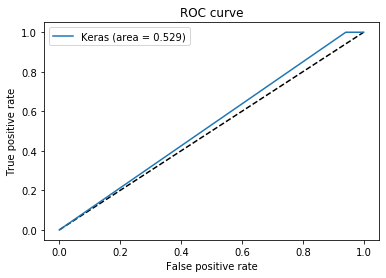

In [56]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.06      0.11        51
           1       0.56      1.00      0.72        62

    accuracy                           0.58       113
   macro avg       0.78      0.53      0.42       113
weighted avg       0.76      0.58      0.45       113



              precision    recall  f1-score   support

           0       1.00      0.04      0.08        24
           1       0.59      1.00      0.74        33

    accuracy                           0.60        57
   macro avg       0.79      0.52      0.41        57
weighted avg       0.76      0.60      0.46        57



In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=train_X.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation ='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

In [43]:
# Binary Classification: Baseline
from keras.models import Sequential
from keras.layers import Dense, Dropout
#from keras.wrappers.scikit_learn import KerasClassifier
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import StratifiedKFold
#from keras.optimizers import SGD

# create model
model = Sequential()
model.add(Dense(32, input_dim=train_X.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
#model.add(Dense(8, activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
# Compile model
#opt = SGD(lr=0.01, momentum=0.8)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(train_X, train_Y, epochs=800, batch_size=20 )

Epoch 1/800
451/451 [==============================] - 0s 106us/step - loss: 0.6315 - accuracy: 0.6208
Epoch 2/800
451/451 [==============================] - 0s 93us/step - loss: 0.6237 - accuracy: 0.6430
Epoch 3/800
451/451 [==============================] - 0s 89us/step - loss: 0.6206 - accuracy: 0.6319
Epoch 4/800
451/451 [==============================] - 0s 84us/step - loss: 0.6231 - accuracy: 0.6275
Epoch 5/800
451/451 [==============================] - 0s 86us/step - loss: 0.6044 - accuracy: 0.6785
Epoch 6/800
451/451 [==============================] - 0s 85us/step - loss: 0.6283 - accuracy: 0.6541
Epoch 7/800
451/451 [==============================] - 0s 83us/step - loss: 0.6133 - accuracy: 0.6608
Epoch 8/800
451/451 [==============================] - 0s 90us/step - loss: 0.6182 - accuracy: 0.6630
Epoch 9/800
451/451 [==============================] - 0s 90us/step - loss: 0.6181 - accuracy: 0.6608
Epoch 10/800
451/451 [==============================] - 0s 89us/step - loss: 0.62

451/451 [==============================] - 0s 82us/step - loss: 0.5738 - accuracy: 0.6763
Epoch 81/800
451/451 [==============================] - 0s 79us/step - loss: 0.6111 - accuracy: 0.6585
Epoch 82/800
451/451 [==============================] - 0s 84us/step - loss: 0.5829 - accuracy: 0.6874
Epoch 83/800
451/451 [==============================] - 0s 89us/step - loss: 0.6056 - accuracy: 0.6630
Epoch 84/800
451/451 [==============================] - 0s 87us/step - loss: 0.6025 - accuracy: 0.6741
Epoch 85/800
451/451 [==============================] - 0s 79us/step - loss: 0.5980 - accuracy: 0.6785
Epoch 86/800
451/451 [==============================] - 0s 101us/step - loss: 0.5957 - accuracy: 0.6829
Epoch 87/800
451/451 [==============================] - 0s 90us/step - loss: 0.6001 - accuracy: 0.6563
Epoch 88/800
451/451 [==============================] - 0s 92us/step - loss: 0.6176 - accuracy: 0.6563
Epoch 89/800
451/451 [==============================] - 0s 92us/step - loss: 0.5839 -

KeyboardInterrupt: 

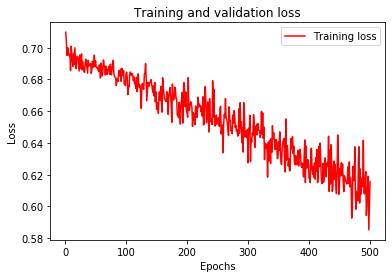

In [45]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
#val_acc = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r-', label='Training loss')
# b is for "solid blue line"
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

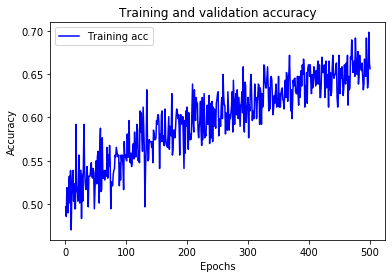

In [46]:
plt.clf()   # clear figure
acc_values = history.history['accuracy']
#val_acc_values = history.history['val_acc']

plt.plot(epochs, acc, 'b-', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [49]:
# dense = 32
test_score, test_acc = model.evaluate(test_X, test_Y)
train_score, train_acc = model.evaluate(train_X, train_Y)
print(train_score, train_acc)
print(test_score, test_acc)

451/451 [==============================] - 0s 26us/step
0.549418857911738 0.725055456161499
2.4972837984034446 0.4690265357494354


In [73]:
# including close, excluding leading_sentiment
test_score, test_acc = model.evaluate(test_X, test_Y)
train_score, train_acc = model.evaluate(train_X, train_Y)
print(train_score, train_acc)
print(test_score, test_acc)

451/451 [==============================] - 0s 29us/step
0.5650370297767635 0.725055456161499
3.81061739626184 0.4955752193927765


In [62]:
test_score, test_acc = model.evaluate(test_X, test_Y)
train_score, train_acc = model.evaluate(train_X, train_Y)
print(train_score, train_acc)
print(test_score, test_acc)

451/451 [==============================] - 0s 32us/step
0.595522548796861 0.6829268336296082
1.5914605718798343 0.5752212405204773


In [63]:
y_true, y_pred = test_Y, model.predict(test_X)
y_pred = np.where(y_pred>0.5, 1,0)
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.14      0.23        51
           1       0.57      0.94      0.71        62

    accuracy                           0.58       113
   macro avg       0.60      0.54      0.47       113
weighted avg       0.60      0.58      0.49       113



In [41]:
# no dense = 8
test_score, test_acc = model.evaluate(test_X, test_Y)
train_score, train_acc = model.evaluate(train_X, train_Y)
print(train_score, train_acc)
print(test_score, test_acc)

451/451 [==============================] - 0s 23us/step
0.6042460974330648 0.6829268336296082
0.7563686940522321 0.5840708017349243


In [42]:
y_true, y_pred = test_Y, model.predict(test_X)
y_pred = np.where(y_pred>0.5, 1,0)
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.29      0.39        51
           1       0.59      0.82      0.68        62

    accuracy                           0.58       113
   macro avg       0.58      0.56      0.54       113
weighted avg       0.58      0.58      0.55       113



In [27]:
test_score, test_acc = model.evaluate(test_X, test_Y)
train_score, train_acc = model.evaluate(train_X, train_Y)
print(train_score, train_acc)
print(test_score, test_acc)

507/507 [==============================] - 0s 36us/step
0.5924883096881167 0.6982248425483704
1.0705444373582538 0.5789473652839661


In [28]:
y_true, y_pred = test_Y, model.predict(test_X)
y_pred = np.where(y_pred>0.5, 1,0)
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.21      0.29        24
           1       0.60      0.85      0.70        33

    accuracy                           0.58        57
   macro avg       0.55      0.53      0.50        57
weighted avg       0.56      0.58      0.53        57



In [30]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_true, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

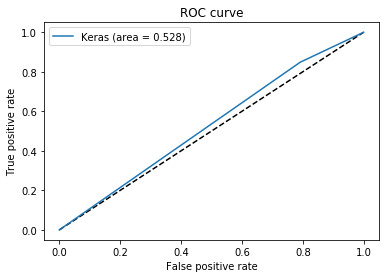

In [32]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
#from keras.wrappers.scikit_learn import KerasClassifier

tscv = TimeSeriesSplit()
parameters = {'solver': ['adam'],
              'activation':['relu','sgd'],
              #'shuffle':[False],
              'max_iter': [200,250,500,600,700,800,900,1000],
              'hidden_layer_sizes':[(32,16,8),(32,16),(32,),(16,32)],
              #'hidden_layer_sizes':[(30,15,),(32,16),(32,),(32,32,16)],
              'random_state':[0,42,135]}
clf = GridSearchCV(MLPClassifier(), parameters, cv=tscv, n_jobs=-1)

clf.fit(train_X, train_Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     ne...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'sgd'],
                         'hidden_layer_sizes': [(32, 16, 8), (32, 16), (32,)

In [16]:
print(clf.score(train_X, train_Y))
print(clf.best_params_)

0.6895787139689579
{'activation': 'relu', 'hidden_layer_sizes': (16, 32), 'max_iter': 800, 'random_state': 42, 'solver': 'adam'}


In [17]:
y_true, y_pred = test_Y, clf.predict(test_X)
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.20      0.28        51
           1       0.56      0.84      0.67        62

    accuracy                           0.55       113
   macro avg       0.53      0.52      0.48       113
weighted avg       0.53      0.55      0.50       113



In [24]:
# Binary Classification: Baseline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.optimizers import SGD

# create model
model = Sequential()
model.add(Dense(32, input_dim=train_X.shape[1], activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
# Compile model
#opt = SGD(lr=0.01, momentum=0.8)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
____________________________________________________

In [25]:
history = model.fit(train_X, train_Y, epochs=500, batch_size=20 )

Epoch 1/500
451/451 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5078
Epoch 2/500
451/451 [==============================] - 0s 105us/step - loss: 0.6908 - accuracy: 0.5322
Epoch 3/500
451/451 [==============================] - 0s 108us/step - loss: 0.6929 - accuracy: 0.5277
Epoch 4/500
451/451 [==============================] - 0s 105us/step - loss: 0.6910 - accuracy: 0.5610
Epoch 5/500
451/451 [==============================] - 0s 104us/step - loss: 0.6915 - accuracy: 0.5455
Epoch 6/500
451/451 [==============================] - 0s 101us/step - loss: 0.6894 - accuracy: 0.5188
Epoch 7/500
451/451 [==============================] - 0s 101us/step - loss: 0.6909 - accuracy: 0.5410
Epoch 8/500
451/451 [==============================] - 0s 113us/step - loss: 0.6899 - accuracy: 0.5543
Epoch 9/500
451/451 [==============================] - 0s 103us/step - loss: 0.6885 - accuracy: 0.5211
Epoch 10/500
451/451 [==============================] - 0s 105us/step - los

451/451 [==============================] - 0s 112us/step - loss: 0.6476 - accuracy: 0.6341
Epoch 158/500
451/451 [==============================] - 0s 103us/step - loss: 0.6588 - accuracy: 0.5831
Epoch 159/500
451/451 [==============================] - 0s 109us/step - loss: 0.6367 - accuracy: 0.6519
Epoch 160/500
451/451 [==============================] - 0s 105us/step - loss: 0.6562 - accuracy: 0.6231
Epoch 161/500
451/451 [==============================] - 0s 113us/step - loss: 0.6540 - accuracy: 0.6009
Epoch 162/500
451/451 [==============================] - 0s 108us/step - loss: 0.6483 - accuracy: 0.6142
Epoch 163/500
451/451 [==============================] - 0s 110us/step - loss: 0.6559 - accuracy: 0.5765
Epoch 164/500
451/451 [==============================] - 0s 103us/step - loss: 0.6648 - accuracy: 0.5721
Epoch 165/500
451/451 [==============================] - 0s 107us/step - loss: 0.6504 - accuracy: 0.6098
Epoch 166/500
451/451 [==============================] - 0s 105us/ste

451/451 [==============================] - 0s 108us/step - loss: 0.6089 - accuracy: 0.6541
Epoch 314/500
451/451 [==============================] - 0s 103us/step - loss: 0.5750 - accuracy: 0.6718
Epoch 315/500
451/451 [==============================] - 0s 100us/step - loss: 0.5851 - accuracy: 0.6829
Epoch 316/500
451/451 [==============================] - 0s 97us/step - loss: 0.5812 - accuracy: 0.6874
Epoch 317/500
451/451 [==============================] - 0s 99us/step - loss: 0.5987 - accuracy: 0.6652
Epoch 318/500
451/451 [==============================] - 0s 101us/step - loss: 0.5917 - accuracy: 0.6630
Epoch 319/500
451/451 [==============================] - 0s 99us/step - loss: 0.5890 - accuracy: 0.6674
Epoch 320/500
451/451 [==============================] - 0s 105us/step - loss: 0.5824 - accuracy: 0.6585
Epoch 321/500
451/451 [==============================] - 0s 101us/step - loss: 0.5918 - accuracy: 0.6519
Epoch 322/500
451/451 [==============================] - 0s 100us/step -

451/451 [==============================] - 0s 106us/step - loss: 0.5253 - accuracy: 0.7228
Epoch 470/500
451/451 [==============================] - 0s 97us/step - loss: 0.5503 - accuracy: 0.7118
Epoch 471/500
451/451 [==============================] - 0s 100us/step - loss: 0.5481 - accuracy: 0.7273
Epoch 472/500
451/451 [==============================] - 0s 103us/step - loss: 0.5184 - accuracy: 0.7251
Epoch 473/500
451/451 [==============================] - 0s 100us/step - loss: 0.5138 - accuracy: 0.7494
Epoch 474/500
451/451 [==============================] - 0s 99us/step - loss: 0.5344 - accuracy: 0.7317
Epoch 475/500
451/451 [==============================] - 0s 103us/step - loss: 0.5073 - accuracy: 0.7450
Epoch 476/500
451/451 [==============================] - 0s 109us/step - loss: 0.5541 - accuracy: 0.7406
Epoch 477/500
451/451 [==============================] - 0s 100us/step - loss: 0.5276 - accuracy: 0.7162
Epoch 478/500
451/451 [==============================] - 0s 102us/step 

In [26]:
test_score, test_acc = model.evaluate(test_X, test_Y)
train_score, train_acc = model.evaluate(train_X, train_Y)
print(train_score, train_acc)
print(test_score, test_acc)

451/451 [==============================] - 0s 25us/step
0.4416661932176503 0.809312641620636
4.411197565298165 0.5221238732337952


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true,y_pred)


array([[ 3, 60],
       [ 2, 76]])

In [21]:
test_score, test_acc = model.evaluate(test_X, test_Y)
train_score, train_acc = model.evaluate(train_X, train_Y)
print(train_score, train_acc)
print(test_score, test_acc)

507/507 [==============================] - 0s 26us/step
0.6705928620031835 0.5542406439781189
0.6786434190315113 0.5614035129547119


In [24]:
test_score, test_acc = model.evaluate(test_X, test_Y)
train_score, train_acc = model.evaluate(train_X, train_Y)
print(train_score, train_acc)
print(test_score, test_acc)

507/507 [==============================] - 0s 23us/step
0.644549614285106 0.5917159914970398
3.3555499461659215 0.6140350699424744


In [29]:
test_score, test_acc = model.evaluate(test_X, test_Y)
train_score, train_acc = model.evaluate(train_X, train_Y)
print(train_score, train_acc)
print(test_score, test_acc)

507/507 [==============================] - 0s 24us/step
0.620401078956367 0.6469427943229675
0.781564942577429 0.6140350699424744


In [34]:
test_score, test_acc = model.evaluate(test_X, test_Y)
train_score, train_acc = model.evaluate(train_X, train_Y)
print(train_score, train_acc)
print(test_score, test_acc)

507/507 [==============================] - 0s 28us/step
0.6814383865578405 0.540433943271637
0.7148746388000354 0.5789473652839661


In [149]:
test_score, test_acc = model.evaluate(test_X, test_Y)
train_score, train_acc = model.evaluate(train_X, train_Y)
print(train_score, train_acc)
print(test_score, test_acc)

507/507 [==============================] - 0s 49us/step
0.6392032797990231 0.6410256624221802
1.409364570651138 0.5789473652839661


In [211]:
test_score, test_acc = model.evaluate(test_X, test_Y)
train_score, train_acc = model.evaluate(train_X, train_Y)
print(train_score, train_acc)
print(test_score, test_acc)

507/507 [==============================] - 0s 31us/step
0.608793915434937 0.6429980397224426
2.019443762929816 0.5789473652839661


In [215]:
test_score, test_acc = model.evaluate(test_X, test_Y)
train_score, train_acc = model.evaluate(train_X, train_Y)
print(train_score, train_acc)
print(test_score, test_acc)

507/507 [==============================] - 0s 34us/step
0.5909011150017763 0.6568047404289246
1.8472509760605662 0.5964912176132202


In [206]:
test_score, test_acc = model.evaluate(test_X, test_Y)
train_score, train_acc = model.evaluate(train_X, train_Y)
print(train_score, train_acc)
print(test_score, test_acc)

507/507 [==============================] - 0s 30us/step
0.5450337660853444 0.7041420340538025
5.501849442197566 0.5789473652839661


In [202]:
test_score, test_acc = model.evaluate(test_X, test_Y)
train_score, train_acc = model.evaluate(train_X, train_Y)
print(train_score, train_acc)
print(test_score, test_acc)

507/507 [==============================] - 0s 45us/step
0.5427894602278045 0.6646943092346191
4.301390974145186 0.6315789222717285


In [ ]:
from keras.layers import Dense, Dropout, LSTM

model.add(LSTM(16, return_sequences=True, input_shape=(1, col)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# return x_train, y_train, x_test, y_test

In [ ]:
model.fit(X_train, y_train, epochs=3, batch_size=64)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn import metrics

In [ ]:
rf = RandomForestRegressor(n_estimators = 10000, random_state = 42)
# Train the model on training data
rf.fit(train_X, train_Y);

In [ ]:
predictions = rf.predict(test_X)

In [ ]:
predictions

In [ ]:
errors = abs(predictions - test_Y['Y'])
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))